In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [3]:
train_scale = x_train.astype('float32')/255
test_scale = x_test.astype('float32')/255
train_scale = np.reshape(train_scale,(len(train_scale),28,28,1))
test_scale = np.reshape(test_scale,(len(test_scale),28,28,1))

In [4]:
noise = 0.5
train_noise = train_scale + noise * np.random.normal(loc=0.0,scale=1.0,size=train_scale.shape)
test_noise = test_scale + noise * np.random.normal(loc=0.0,scale=1.0,size=test_scale.shape)
train_noise = np.clip(train_noise,0.,1.)
test_noise = np.clip(test_noise,0.,1.)

In [5]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16,(3,3),activation = 'relu',padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)

In [6]:
print('Name:BARATHRAJ B  Register Number:212222230019')
autoencoder.summary()


Name:BARATHRAJ B  Register Number:212222230019


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_noise, train_scale,
                epochs=4,
                batch_size=128,
                shuffle=True,
                validation_data=(test_noise, test_scale))

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 155ms/step - loss: 0.3301 - val_loss: 0.1810
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 152ms/step - loss: 0.1767 - val_loss: 0.1624
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 150ms/step - loss: 0.1610 - val_loss: 0.1523
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - loss: 0.1528 - val_loss: 0.1469


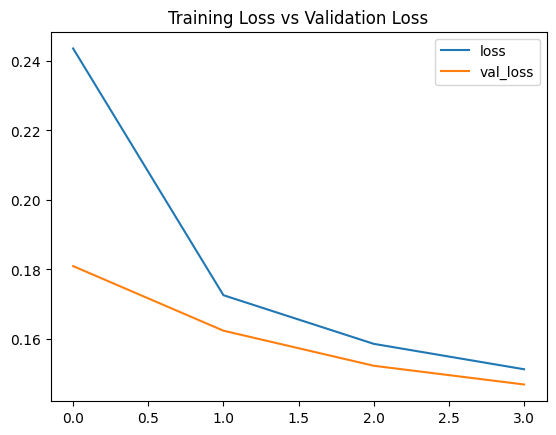

In [8]:
import pandas as pd
metrics = pd.DataFrame(autoencoder.history.history)
plt.figure()
plt.plot(metrics['loss'],label='loss')
plt.plot(metrics['val_loss'],label='val_loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()



In [9]:
decoded = autoencoder.predict(test_noise)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


Name:BARATHRAJ B  Register Number:212222230019


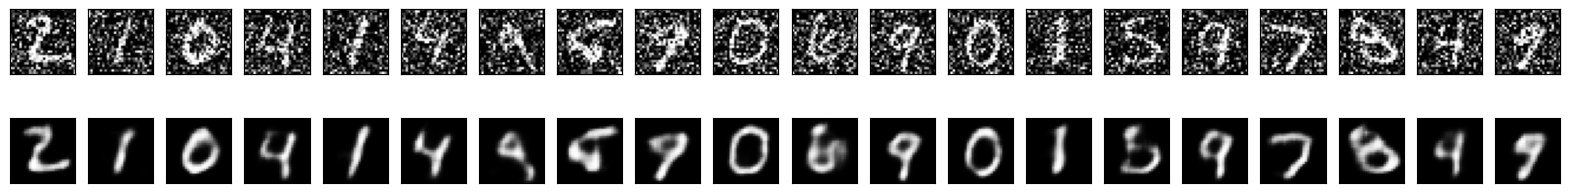

In [10]:

n = 20
print('Name:BARATHRAJ B  Register Number:212222230019')
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):

    ax = plt.subplot(1, n, i)
    plt.imshow(test_scale[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n)
    plt.imshow(test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()